# chapter 04 | 분류

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 플롯 스타일
# plt.style.use('seaborn')
# 한글 폰트, 마이너스 표시
plt.rc('font',family='AppleGothic')
plt.rc('axes', unicode_minus=False)


## 02. 결정트리
```
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)[source]
```

- `max_depth` : 트리의 깊이
- `min_samples_split` : 최소 분할 샘플수
- `min_samples_leaf` : 리프노드가 가지는 최소 샘플수
- `max_features` : 최적의 분할을 위해 고려하는 최대 피처 개수 ('auto'=sqrt)
- `max_leaf_nodes` : 최대 리프노드 개수

### graphviz 시각화

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

iris = load_iris()
print(dir(iris))
data = iris.data
target = iris.target
print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=156)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', class_names = iris.target_names, 
              feature_names = iris.feature_names, impurity=True, filled=True)

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
(150, 4) (150,)
(112, 4) (38, 4) (112,) (38,)


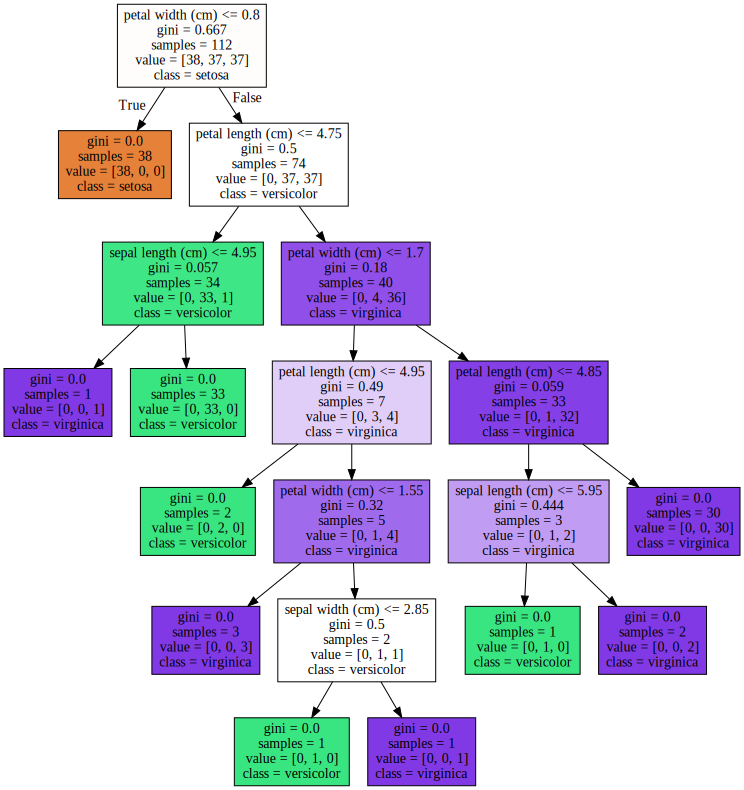

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

[0.04385854 0.01339392 0.40574827 0.53699927]
sepal length (cm) 0.0439
sepal width (cm) 0.0134
petal length (cm) 0.4057
petal width (cm) 0.537


<AxesSubplot:>

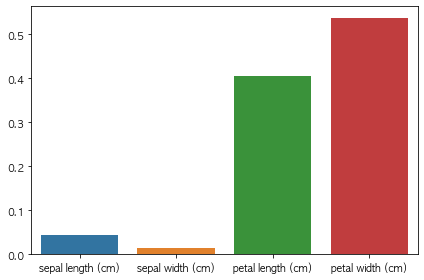

In [4]:
print(tree.feature_importances_)
for name, value in zip(iris.feature_names, tree.feature_importances_):
    print(name, np.round(value,4))
    
# 시각화 방법 1. matplotlib bar
val_dict = dict(zip(iris.feature_names, tree.feature_importances_))
plt.bar(x=list(val_dict.keys()), height=list(val_dict.values()))
plt.tight_layout()

# 시각화 방법 2. seaborn
sns.barplot(y = tree.feature_importances_, x = iris.feature_names)
# print(tree.feature_importances_)
# print(iris.feature_names)

### 결정 트리 과적합 (Overfitting)
- `make_classification` : 분류를 위한 테스트용 데이터, 피처 데이터 세트와 레이블 데이터 세트를 반환
- `visualize_boundary` : 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타냄

(100, 2) (100,)


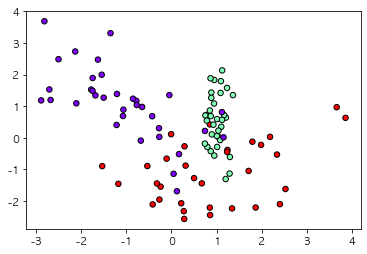

In [5]:
from sklearn.datasets import make_classification

X_features, y_labels = make_classification(n_features=2, n_informative=2, n_redundant=0,
                                         n_classes=3, n_clusters_per_class=1, random_state=0)

print(X_features.shape, y_labels.shape)
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=30, edgecolors='k', cmap=plt.cm.rainbow)

In [6]:
# code from wikibooks github
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

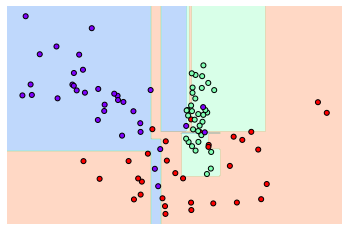

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(tree, X_features, y_labels)

In [8]:
! pip install pydotplus

In [9]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

tree = DecisionTreeClassifier().fit(X_features, y_labels)

# 방법1.png 저장
dot_data = export_graphviz(tree, out_file=None, feature_names=None, class_names=True,
               filled=True, impurity=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('30,30!')
pydot_graph.write_png('tree_default.png')

# 방법2. cell에 표시
# export_graphviz(tree, out_file='tree_default.dot', filled=True, impurity=True)
# with open("tree_default.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

True

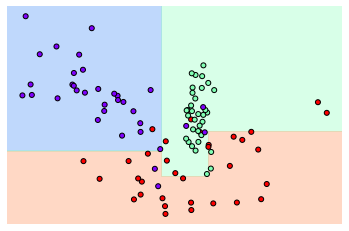

In [10]:
tree = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(tree, X_features, y_labels)

In [11]:
# png 저장
dot_data = export_graphviz(tree, out_file=None, feature_names=None, class_names=True,
               filled=True, impurity=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('30,30!')
pydot_graph.write_png('tree_min_samples_leaf.png')

True

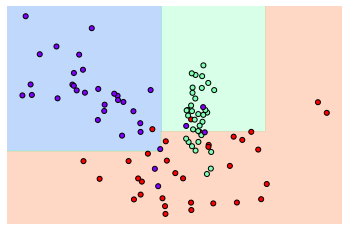

In [12]:
tree = DecisionTreeClassifier(max_leaf_nodes=5).fit(X_features, y_labels)
visualize_boundary(tree, X_features, y_labels)

In [13]:
# png 저장
dot_data = export_graphviz(tree, out_file=None, feature_names=None, class_names=True,
               filled=True, impurity=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('30,30!')
pydot_graph.write_png('tree_max_leaf_nodes.png')

True

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [14]:
PATH = './human_activity/'
os.listdir(PATH)

['.DS_Store',
 'test',
 'features.txt',
 'activity_labels.txt',
 'features_info.txt',
 'train',
 'README.txt']

In [15]:
feature_name_df = pd.read_csv(PATH + "features.txt", sep='\s+',
                             header=None, names = ['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()
print(len(feature_name))
print(feature_name[:10])

561
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [16]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [17]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [18]:

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'], dtype=int)
    new_feature_name_df = pd.merge(old_feature_name_df, feature_dup_df, 
                                   left_on=old_feature_name_df.index, right_on=feature_dup_df.index,
                                   how='outer' )

    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x :
                                                                                     x[0]+"_"+str(x[1]) 
                                                                                     if x[1]>0
                                                                                     else x[0], axis=1)
    #'key_0', 'column_index', 'column_name', 'dup_cnt', 'new_column_name'
    new_feature_name_df = new_feature_name_df[['column_index','column_name']]
    return new_feature_name_df

df = get_new_feature_name_df(feature_name_df)
df[df['column_name'].str.contains('_')]

,column_index,column_name
316,317,"fBodyAcc-bandsEnergy()-1,8_1"
317,318,"fBodyAcc-bandsEnergy()-9,16_1"
318,319,"fBodyAcc-bandsEnergy()-17,24_1"
319,320,"fBodyAcc-bandsEnergy()-25,32_1"
320,321,"fBodyAcc-bandsEnergy()-33,40_1"
...,...,...
497,498,"fBodyGyro-bandsEnergy()-17,32_2"
498,499,"fBodyGyro-bandsEnergy()-33,48_2"
499,500,"fBodyGyro-bandsEnergy()-49,64_2"
500,501,"fBodyGyro-bandsEnergy()-1,24_2"


In [19]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [20]:
print("학습 피처 데이터셋 info()")
print(X_train.info())

학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [22]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
acc = accuracy_score(y_test, pred)

print("acc : {:.4f}".format(acc))
print("hyper-params : ", tree.get_params())

acc : 0.8697
hyper-params :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


1. max_depth 가 예측 정확도에 주는 영향
#### GridSearchCV
#### 모델 인자
- `verose` : 메시지 출력 방식
    - \>1 : the computation time for each fold and parameter candidate is displayed;
    - \>2 : the score is also displayed;
    - \>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

#### 객체 메서드
- `cv_results_` : CV 세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치
- `best_score_` : 최고 평균 정확도
- `best_params_` : 최적의 하이퍼 파라미터
- `best_estimator_` : 최적의 하이퍼 파라미터로 튜닝된 모델
- `feature_importances_` : 피처 중요도

In [25]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth":[6,8,10,12,14,16]
}
grid_tree = GridSearchCV(tree, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy', verbose=1 )
grid_tree.fit(X_train, y_train)
print("average acc : {:.4f}".format(grid_tree.best_score_))
print("optimized hyper-parms : ", grid_tree.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.2s finished


average acc : 0.8523
optimized hyper-parms :  {'max_depth': 8}


In [26]:
cv_results_df = pd.DataFrame(grid_tree.cv_results_)
# cv_results_df[['param_max_depth', 'mean_test_score']]
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.272600,0.024112,0.014393,0.004336,6,{'max_depth': 6},0.807614,0.872876,0.800680,0.870068,0.870748,0.844397,0.032950,5
1,2.716907,0.151578,0.009842,0.003192,8,{'max_depth': 8},0.811013,0.824609,0.857143,0.877551,0.891156,0.852294,0.030471,1
2,3.012782,0.077533,0.009765,0.004719,10,{'max_depth': 10},0.819171,0.825969,0.840816,0.886395,0.887075,0.851885,0.029304,2
3,3.280238,0.195514,0.008734,0.002790,12,{'max_depth': 12},0.789259,0.815092,0.863265,0.880272,0.885714,0.846720,0.038006,3
4,3.545609,0.214577,0.007610,0.003682,14,{'max_depth': 14},0.800816,0.814412,0.834014,0.880952,0.888435,0.843726,0.035156,6
5,3.336957,0.262820,0.005851,0.001417,16,{'max_depth': 16},0.793338,0.801496,0.838095,0.896599,0.892517,0.844409,0.043653,4


In [27]:
max_depths = [6,8,10,12,14]

for depth in max_depths :
    tree = DecisionTreeClassifier(max_depth=depth, random_state=156)
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    acc = accuracy_score(y_test, pred)
    
    print("depth :{:d}, acc : {:.4f}".format(depth, acc))

depth :6, acc : 0.8558
depth :8, acc : 0.8707
depth :10, acc : 0.8673
depth :12, acc : 0.8646
depth :14, acc : 0.8571


2. max_depth + min_samples_split

In [28]:
params = {
    "max_depth":[6,8,10,12,14],
    "min_samples_split":[16,24]
}

grid_tree = GridSearchCV(tree, param_grid=params, cv=5, scoring='accuracy', verbose=1)
grid_tree.fit(X_train, y_train)
print("best_acc : {:.4f}".format(grid_tree.best_score_))
print("best_params : {}".format(grid_tree.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


best_acc : 0.8549
best_params : {'max_depth': 8, 'min_samples_split': 16}


In [29]:
best_tree = grid_tree.best_estimator_
pred1 = best_tree.predict(X_test)
acc = accuracy_score(y_test, pred1)
print("결정 트리 예측 정확도 : {:.4f}".format(acc))

결정 트리 예측 정확도 : 0.8717


<AxesSubplot:title={'center':'Feature Importanc Top 20'}>

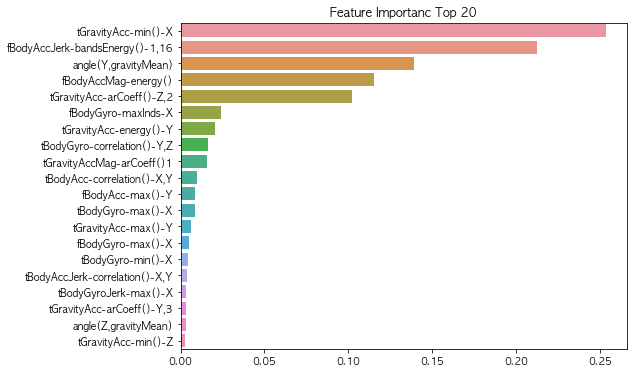

In [30]:
ftr_importance_vals = best_tree.feature_importances_
ftr_importance = pd.Series(ftr_importance_vals, index=X_train.columns)

ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importanc Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)